In [1]:
import pandas as pd
import requests
import json
import pprint
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score, f1_score, precision_recall_curve, roc_curve

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
df = pd.read_csv('traffic_crashes.csv')
df

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,1f1186e0411acc6dcb255905375964f9721a1deb19f463...,2023-07-07 23:30:00,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,23,6,7
1,cc5809e5187918dcbd27eaf4fdf3f1cc8b16a0af90b6bb...,2017-04-15 17:30:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,17,7,4
2,8d7ed21f732dcf4c622c5647b51811874a5e801fa6243a...,2020-06-08 12:00:00,30,NO CONTROLS,NO CONTROLS,UNKNOWN,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,12,2,6
3,a826ba79cb0d2b43d99aa7a2cbc8d06fc0615ab9b03b22...,2024-04-21 05:00:00,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5,1,4
4,e8ce402d816159db6198d2b148fbefa79538614d348a68...,2019-10-26 15:50:00,15,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8265,a8f8f886669d38e58e664c23ee2674a2a8f7e16bae5c5b...,2019-04-02 18:00:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,3,4
8266,5508887f8db62b99ad90ddce0e98ce628cb5fe1a71524a...,2021-03-19 08:46:00,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,T-INTERSECTION,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,8,6,3
8267,ba2cde0fb7612cf98f428389d1fafc9909686c07b71028...,2023-08-19 10:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10,7,8
8268,7ed1975f6d04230c34cd856811ef46c7c5b399c5fb071a...,2017-01-03 14:00:00,35,NO CONTROLS,NO CONTROLS,FOG/SMOKE/HAZE,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,3,1


In [3]:
df = df.drop(columns = ['CRASH_RECORD_ID','CRASH_DATE','WEATHER_CONDITION','SEC_CONTRIBUTORY_CAUSE','STREET_NO','STREET_DIRECTION','STREET_NAME','NUM_UNITS','INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN','CRASH_HOUR'])

WEATHER_CONDITION - new group

In [4]:
df.columns

Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'],
      dtype='object')

In [5]:
df['CRASH_MONTH'].value_counts()

10    793
9     726
12    712
8     712
11    707
7     699
5     681
3     662
1     657
2     649
4     644
6     628
Name: CRASH_MONTH, dtype: int64

In [6]:
top = df['TRAFFIC_CONTROL_DEVICE'].value_counts().head(6).index
df = df[df['TRAFFIC_CONTROL_DEVICE'].isin(top)]

In [7]:
df

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,MOST_SEVERE_INJURY,INJURIES_TOTAL,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,30,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,$500 OR LESS,FAILING TO YIELD RIGHT-OF-WAY,NO INDICATION OF INJURY,0.0,6,7
1,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",NOT APPLICABLE,NO INDICATION OF INJURY,0.0,7,4
2,30,NO CONTROLS,NO CONTROLS,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,2,6
3,25,NO CONTROLS,NO CONTROLS,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",PHYSICAL CONDITION OF DRIVER,NONINCAPACITATING INJURY,1.0,1,4
4,15,NO CONTROLS,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",NOT APPLICABLE,NO INDICATION OF INJURY,0.0,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8265,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,NO INDICATION OF INJURY,0.0,3,4
8266,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,DAYLIGHT,ANGLE,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NO INDICATION OF INJURY,0.0,6,3
8267,30,NO CONTROLS,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,7,8
8268,35,NO CONTROLS,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",NOT APPLICABLE,NO INDICATION OF INJURY,0.0,3,1


In [8]:
top = df['FIRST_CRASH_TYPE'].value_counts().head(12).index
df = df[df['FIRST_CRASH_TYPE'].isin(top)]

In [9]:
top = df['TRAFFICWAY_TYPE'].value_counts().head(11).index
df = df[df['TRAFFICWAY_TYPE'].isin(top)]

In [10]:
top = df['ALIGNMENT'].value_counts().head(4).index
df = df[df['ALIGNMENT'].isin(top)]

In [11]:
top = df['ROADWAY_SURFACE_COND'].value_counts().head(5).index
df = df[df['ROADWAY_SURFACE_COND'].isin(top)]

In [12]:
top = df['INJURIES_TOTAL'].value_counts().head(6).index
df = df[df['INJURIES_TOTAL'].isin(top)]

In [13]:
df.isna().sum()

POSTED_SPEED_LIMIT         0
TRAFFIC_CONTROL_DEVICE     0
DEVICE_CONDITION           0
LIGHTING_CONDITION         0
FIRST_CRASH_TYPE           0
TRAFFICWAY_TYPE            0
ALIGNMENT                  0
ROADWAY_SURFACE_COND       0
ROAD_DEFECT                0
CRASH_TYPE                 0
DAMAGE                     0
PRIM_CONTRIBUTORY_CAUSE    0
MOST_SEVERE_INJURY         0
INJURIES_TOTAL             0
CRASH_DAY_OF_WEEK          0
CRASH_MONTH                0
dtype: int64

In [14]:
defect_mapping = {
    'NO DEFECTS': 'not defected',
    'UNKNOWN': 'unknown',
    
}


df['DEFECT_STATUS'] = df['ROAD_DEFECT'].map(defect_mapping).fillna('defected')

In [15]:
df = df.drop(columns = ['ROAD_DEFECT'])

In [16]:
cause_counts = df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()


threshold = 50
valid_causes = cause_counts[cause_counts >= threshold].index

df = df[df['PRIM_CONTRIBUTORY_CAUSE'].isin(valid_causes)]

In [17]:
df

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,MOST_SEVERE_INJURY,INJURIES_TOTAL,CRASH_DAY_OF_WEEK,CRASH_MONTH,DEFECT_STATUS
0,30,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,NO INJURY / DRIVE AWAY,$500 OR LESS,FAILING TO YIELD RIGHT-OF-WAY,NO INDICATION OF INJURY,0.0,6,7,unknown
1,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO INJURY / DRIVE AWAY,"$501 - $1,500",NOT APPLICABLE,NO INDICATION OF INJURY,0.0,7,4,not defected
2,30,NO CONTROLS,NO CONTROLS,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,2,6,not defected
3,25,NO CONTROLS,NO CONTROLS,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",PHYSICAL CONDITION OF DRIVER,NONINCAPACITATING INJURY,1.0,1,4,not defected
4,15,NO CONTROLS,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,WET,NO INJURY / DRIVE AWAY,"$501 - $1,500",NOT APPLICABLE,NO INDICATION OF INJURY,0.0,7,10,not defected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8265,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,NO INDICATION OF INJURY,0.0,3,4,not defected
8266,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,DAYLIGHT,ANGLE,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NO INDICATION OF INJURY,0.0,6,3,not defected
8267,30,NO CONTROLS,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,7,8,not defected
8268,35,NO CONTROLS,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,WET,NO INJURY / DRIVE AWAY,"OVER $1,500",NOT APPLICABLE,NO INDICATION OF INJURY,0.0,3,1,not defected


In [18]:
df.drop(columns = ['ALIGNMENT','CRASH_DAY_OF_WEEK','CRASH_DAY_OF_WEEK','MOST_SEVERE_INJURY','ROADWAY_SURFACE_COND','CRASH_MONTH','TRAFFICWAY_TYPE'],inplace=True)

In [19]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for i in df.columns:
    df[i] = label.fit_transform(df[i])

In [20]:
df

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,INJURIES_TOTAL,DEFECT_STATUS
0,9,5,5,1,6,1,0,5,0,2
1,9,4,1,3,11,1,1,11,0,1
2,9,1,2,3,10,1,1,14,0,1
3,8,1,2,1,4,0,2,13,1,1
4,6,1,2,3,4,1,1,11,0,1
...,...,...,...,...,...,...,...,...,...,...
8265,9,4,1,3,11,1,2,10,0,1
8266,9,3,1,3,0,0,2,5,0,1
8267,9,1,2,3,4,1,2,14,0,1
8268,10,1,2,3,4,1,2,11,0,1


In [21]:
y = df[['CRASH_TYPE']]
x = df.drop(columns = ['CRASH_TYPE'])


In [22]:
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
nnx = sx.fit_transform(x)
nny = y

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nnx, nny, test_size = 0.2, random_state = 22)

In [24]:
X_train

array([[0.64285714, 0.8       , 0.16666667, ..., 0.06666667, 0.        ,
        0.5       ],
       [0.64285714, 1.        , 0.83333333, ..., 0.93333333, 0.        ,
        0.5       ],
       [0.64285714, 0.8       , 0.16666667, ..., 0.93333333, 0.        ,
        1.        ],
       ...,
       [0.64285714, 0.6       , 0.16666667, ..., 0.        , 0.        ,
        1.        ],
       [0.64285714, 0.2       , 0.33333333, ..., 0.6       , 0.        ,
        0.5       ],
       [0.64285714, 0.8       , 0.16666667, ..., 0.2       , 0.        ,
        0.5       ]])

In [25]:
y_train

,CRASH_TYPE
4076,0
6713,1
1968,0
7825,1
6171,1
...,...
383,1
7680,0
5325,1
6797,0


In [26]:
#if len(set(X_train.index) & set(X_test.index)) == 0:
 #   print("Training and test datasets are disjoint.")
#else:
 #   print("Training and test datasets are not disjoint.")

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
model =keras.Sequential({
    keras.layers.Dense(3,input_shape=(9,),activation='tanh'),
    keras.layers.Dense(1,activation='sigmoid')
})
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics =['accuracy']
)
model.fit(X_train,y_train, epochs = 100)

Epoch 1/100


C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step - accuracy: 0.7472 - loss: 0.7389
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.7482 - loss: 0.4699
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.7350 - loss: 0.3360
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.7499 - loss: 0.2724
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.7449 - loss: 0.2373
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.7467 - loss: 0.2174
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.7510 - loss: 0.2049
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.7558 - loss: 0.1967
Epoch 9/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.7493 - loss: 0.1947
Epoch 10/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.7429 - loss: 0.1934
Epoch 11/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.7360 - loss: 0.1913
Epoch 12/100
191/191 ━━━━━━━━━━

191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.8678 - loss: 0.1029
Epoch 68/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.8766 - loss: 0.0973
Epoch 69/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.8796 - loss: 0.0967
Epoch 70/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.8760 - loss: 0.0978
Epoch 71/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.8673 - loss: 0.1026
Epoch 72/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.8766 - loss: 0.0970
Epoch 73/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.8740 - loss: 0.0988
Epoch 74/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.8773 - loss: 0.0973
Epoch 75/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.8765 - loss: 0.0976
Epoch 76/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.8747 - loss: 0.0970
Epoch 77/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.8762 - loss: 0.0967
Epoch 78/100
191/191 ━━

In [29]:
model.evaluate(X_test,y_test)
y_predict  = model.predict(X_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.8451 - loss: 0.1143
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step


In [30]:
y_plabels = [np.argmax(i) for i in y_predict]

Text(50.722222222222214, 0.5, 'True Value')

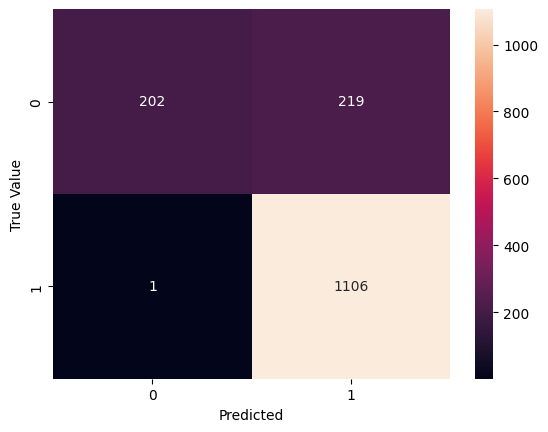

In [31]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_plabels)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True Value')